<h2 style="color:pink;">TP : Température - Système flou </h2>

<h4 style="color:#F5275B;">But du TP</h4>

Ce travail pratique vise à concevoir et modéliser un régulateur flou capable d’ajuster automatiquement la vitesse en fonction de la température ambiante.

Entrée (Input) : Température

Sortie (Output) : Vitesse

L’idée est de permettre au système d’adapter la vitesse de manière autonome selon la variation de la température :

Lorsque la température est basse, la vitesse doit être réduite.

Pour une température modérée, la vitesse sera intermédiaire.

Si la température est élevée, la vitesse devra être maximale.

<h4 style="color:#F5275B;">Démarche de réalisation</h4>

Identifier la variable linguistique Température et définir ses trois catégories floues :

Froide

Confortable

Chaude

Représenter graphiquement les fonctions d’appartenance sur l’intervalle de température [0°C, 50°C].

Déterminer les valeurs d’appartenance (μ) pour certaines températures spécifiques, par exemple 18°C et 28°C.

Mettre en place le système flou complet en définissant la variable de sortie Vitesse et les règles d’inférence floues reliant la température à la vitesse.

Effectuer une simulation pour observer la vitesse obtenue lorsque la température est, par exemple, 17°C.

In [13]:
# Installer les bibliothèques
!pip install scikit-fuzzy
!pip install networkx


In [14]:
#Importer les bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl


In [18]:
# Définition d’une résolution plus précise (pas de 1°C pour la température et 1 unité pour la vitesse)
x_temperature = np.arange(0, 50, 1)      # Température de 0°C à 50°C avec un pas de 1
x_vitesse = np.arange(0, 100, 1) # Vitesse de 0 à 100 avec un pas de 1


In [19]:
# Définition des ensembles flous
#Température
froid = fuzz.trimf(x_temperature, [10, 10, 20])
agreable = fuzz.trimf(x_temperature, [15, 25, 30])
chaud = fuzz.trimf(x_temperature, [27, 50, 50])

# Vitesse
faible  = fuzz.trimf(x_vitesse, [0, 10, 40])
moyenne = fuzz.trimf(x_vitesse, [30, 50, 70])
haute   = fuzz.trimf(x_vitesse, [60, 100, 100])

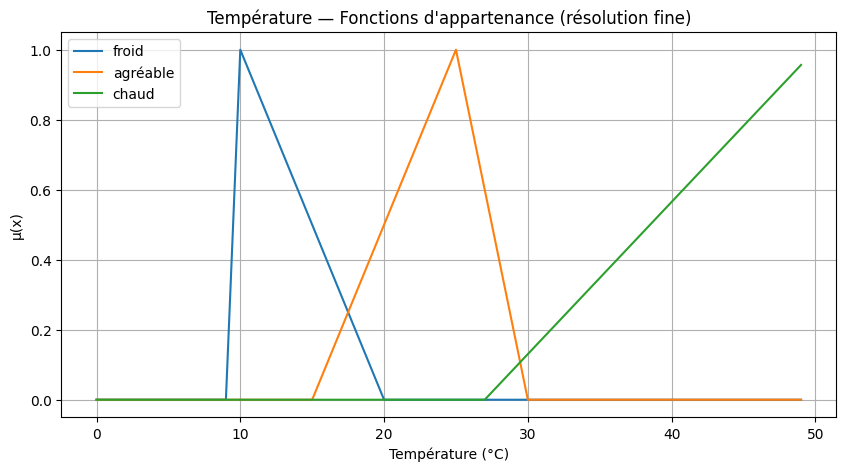

In [20]:
 #Visualiser les ensembles flous
plt.figure(figsize=(10,5))
plt.plot(x_temperature, froid, label='froid')
plt.plot(x_temperature, agreable, label='agréable')
plt.plot(x_temperature, chaud, label='chaud')
plt.title("Température — Fonctions d'appartenance (résolution fine)")
plt.xlabel("Température (°C)")
plt.ylabel("μ(x)")
plt.grid(True)
plt.legend()
plt.show()


In [26]:
# Calcul manuel des degrés d’appartenance
# Fonction pour calculer μ(x) pour chaque ensemble
def degre_appartenance(temp):
    mu_f = fuzz.interp_membership(x_temperature, froid, temp)
    mu_a = fuzz.interp_membership(x_temperature, agreable, temp)
    mu_c = fuzz.interp_membership(x_temperature, chaud, temp)
    return mu_f, mu_a, mu_c

# 🔸 Exemple pour 18°C et 28°C
for t in [18, 28]:
    mu_f, mu_a, mu_c = degre_appartenance(t)
    print(f"{t}°C → Froid: {mu_f:.3f}, Agréable: {mu_a:.3f}, Chaud: {mu_c:.3f}")


18°C → Froid: 0.200, Agréable: 0.300, Chaud: 0.000
28°C → Froid: 0.000, Agréable: 0.400, Chaud: 0.043


In [27]:
#Construire le système flou
# Variables floues
temperature = ctrl.Antecedent(x_temperature, 'temperature')
temperature['froid'] = froid
temperature['agreable'] = agreable
temperature['chaud'] = chaud

vitesse = ctrl.Consequent(x_vitesse, 'vitesse')
vitesse['faible']  = faible
vitesse['moyenne'] = moyenne
vitesse['haute']   = haute

# Règles
r1 = ctrl.Rule(temperature['froid'], vitesse['faible'])
r2 = ctrl.Rule(temperature['agreable'], vitesse['moyenne'])
r3 = ctrl.Rule(temperature['chaud'], vitesse['haute'])


In [28]:
v_ctrl = ctrl.ControlSystem([r1, r2, r3])
sim = ctrl.ControlSystemSimulation(v_ctrl)
sim.input['temperature'] = 17
sim.compute()
print(f"Temp = 17°C → vitesse calculée = {sim.output['vitesse']:.2f}")


Temp = 17°C → vitesse calculée = 31.40


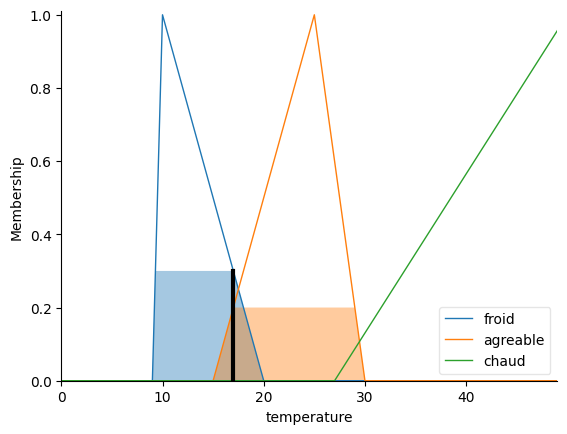

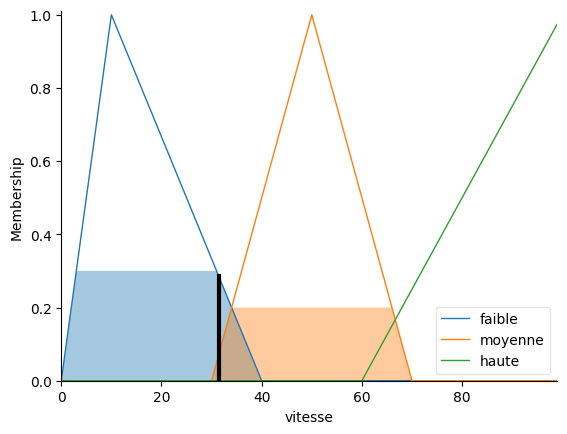

In [29]:
temperature.view(sim=sim); vitesse.view(sim=sim); plt.show()
